1. Here is a Python function that implements Forward Euler method:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def FEulerClass(t0, tN, k, f, U0):
    N = int((tN - t0) / k)
    t = np.linspace(t0, tN, N + 1)

    U = np.zeros(N + 1)
    U[0] = U0

    for i in range(N):
        U[i + 1] = U[i] + k * f(U[i], t[i])

    return t, U

2. Here an IVP: INPUTs

In [2]:
# INPUT
t0 = 1  # interval
tN = 5
f = lambda u, t: (u**2 + u) / t  # rhs of IVP
U0 = -2  # IC
ue = lambda t: 2 * t / (1 - 2 * t)  # exact solution


3. Here we solve the problem using **FEulerClass**

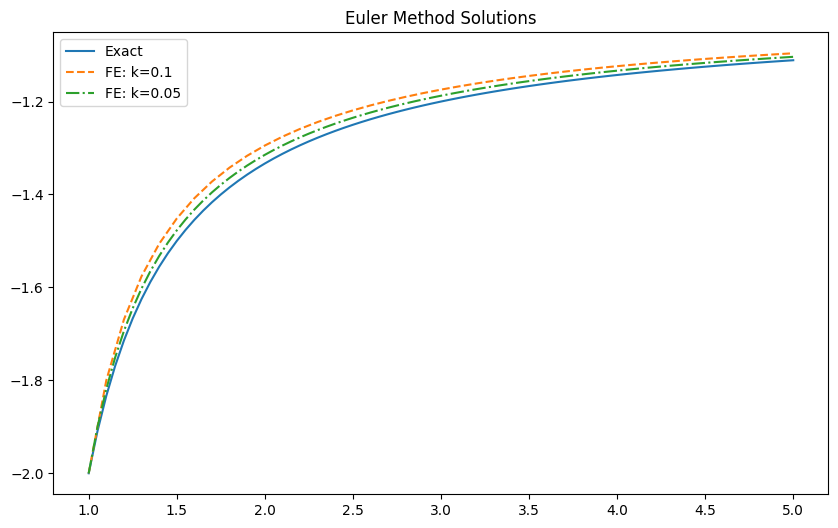

In [3]:
k1 = 0.1  # time step
k2 = 0.05
t1, U1 = FEulerClass(t0, tN, k1, f, U0)
t2, U2 = FEulerClass(t0, tN, k2, f, U0)

# Result Analysis
plt.figure(figsize=(10, 6))
plt.plot(t2, ue(t2), label='Exact')
plt.plot(t1, U1, '--', label='FE: k=0.1')
plt.plot(t2, U2, '-.', label='FE: k=0.05')
plt.legend(loc='best')  # Change the legend location to 'best'
plt.title('Euler Method Solutions')
plt.show()

4. Compare the exact solution with the two approximations by computing the error.


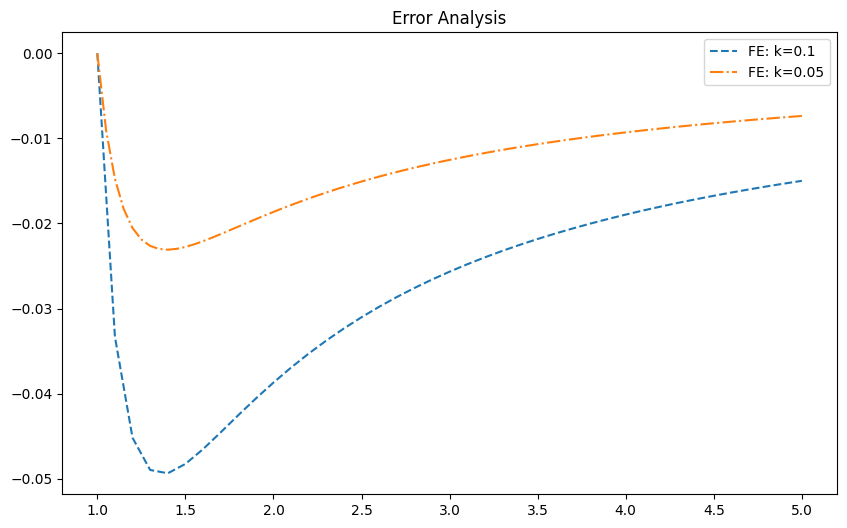

In [4]:

E1 = ue(t1) - U1
E2 = ue(t2) - U2

plt.figure(figsize=(10, 6))
plt.plot(t1, E1, '--', label='FE: k=0.1')
plt.plot(t2, E2, '-.', label='FE: k=0.05')
plt.legend(loc='best')  # Change the legend location to 'best'
plt.title('Error Analysis')
plt.show()

5. Check if the global error behaves as expected when h is halved.

In [9]:
E1_infnorm = np.linalg.norm(E1, np.inf)
E2_infnorm = np.linalg.norm(E2, np.inf)

print(f'k1/k2: {k1/k2}')
print(f'E1_infnorm/E2_infnorm: {E1_infnorm/E2_infnorm}')

k1/k2: 2.0
E1_infnorm/E2_infnorm: 2.138342441624298


6. Compute the corresponding global error for k=0.1, 0.05, 0.025, 0.0125, ...

In [6]:
kvec = 0.1 / 2.0**np.arange(7)

error_norms = []
for k in kvec:
    t, U = FEulerClass(t0, tN, k, f, U0)
    E = ue(t) - U
    E_infnorm = np.linalg.norm(E, np.inf)
    error_norms.append(E_infnorm)

ratio = [np.nan] + [error_norms[i - 1] / error_norms[i] for i in range(1, len(error_norms))]
order = np.log2(ratio)

results = np.vstack((kvec, error_norms, ratio, order)).T
columns = ['k', 'Error', 'Ratio', 'Order']
print(results)

[[1.00000000e-01 4.93624103e-02            nan            nan]
 [5.00000000e-02 2.30844271e-02 2.13834244e+00 1.09649291e+00]
 [2.50000000e-02 1.11881450e-02 2.06329353e+00 1.04494908e+00]
 [1.25000000e-02 5.51248024e-03 2.02960273e+00 1.02119737e+00]
 [6.25000000e-03 2.73639782e-03 2.01450249e+00 1.01042359e+00]
 [3.12500000e-03 1.36330482e-03 2.00717974e+00 1.00516982e+00]
 [1.56250000e-03 6.80439895e-04 2.00356392e+00 1.00256854e+00]]


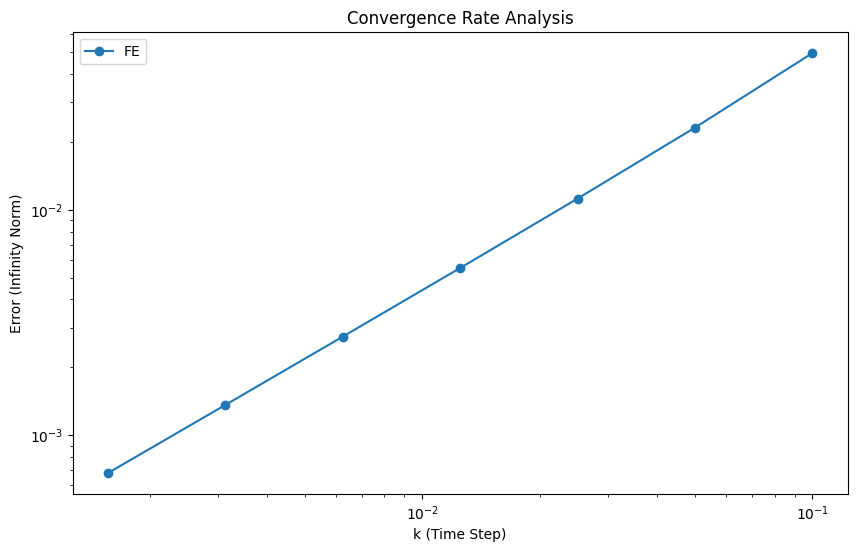

In [7]:
plt.figure(figsize=(10, 6))
plt.loglog(kvec, error_norms, 'o-', label='FE')
plt.xlabel('k (Time Step)')
plt.ylabel('Error (Infinity Norm)')
plt.title('Convergence Rate Analysis')
plt.legend()
plt.show()